In [1]:
import cv2
import numpy as np
import time
from scipy.spatial.distance import euclidean
from imutils import perspective
from imutils import contours
import imutils
import serial

In [2]:
font = cv2.FONT_HERSHEY_SIMPLEX

# org
org1 = (40, 50)
org2 = (40, 30)
# fontScale
fontScale = 0.5

# Blue color in BGR
color = (0, 0, 255)

# Line thickness of 2 px
thickness = 1

In [23]:
def drawCoutour(count, image):
    for cnt in count:
        surroundings = cv2.minAreaRect(cnt)
        surroundings = cv2.boxPoints(surroundings)
        surroundings = np.array(surroundings, dtype="int")
        surroundings = perspective.order_points(surroundings)
        (tl, tr, br, bl) = surroundings
        # Draw the boxes
        cv2.drawContours(image, [surroundings.astype("int")], -1, (0, 0, 255), 2)

In [4]:
def increase_brightness(img, value=0):
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    h, s, v = cv2.split(hsv)

    lim = 255 - value
    v[v > lim] = 255
    v[v <= lim] += value

    final_hsv = cv2.merge((h, s, v))
    img = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2BGR)
    return img

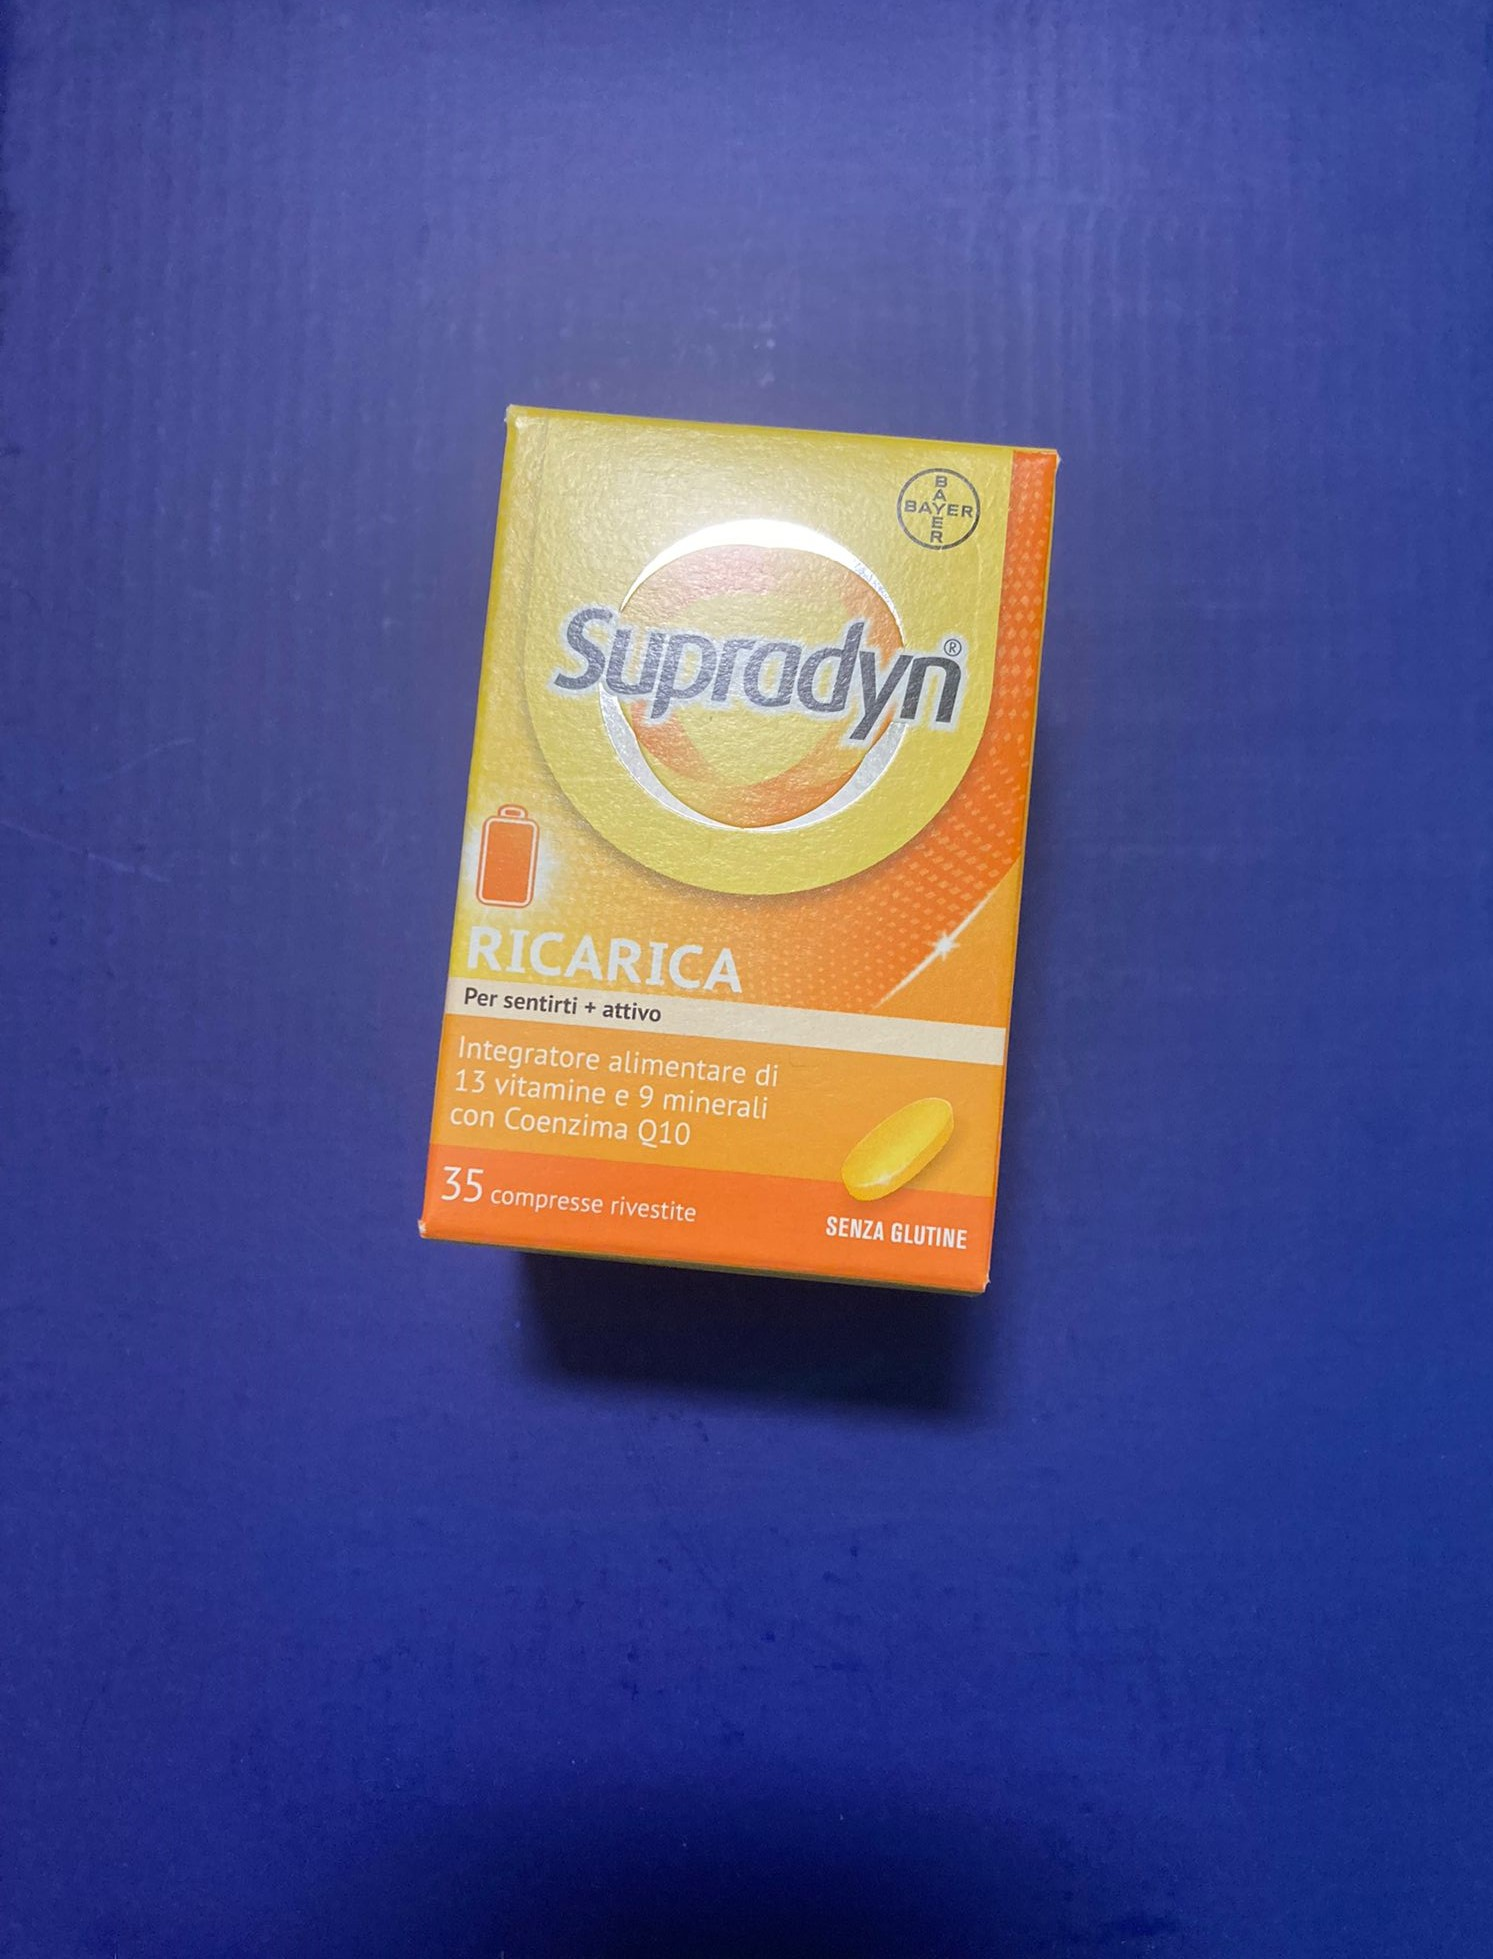

1959 1493
What is the object deepness? : 5


True

In [112]:
image = cv2.imread('image1.jpeg')
    #Görüntüyü Sadece Hazne Gözükecek şekilde kırp


from IPython.display import display, Image
display(Image(filename='image1.jpeg'))

h_pxl,w_pxl,c=np.shape(image)
print(h_pxl,w_pxl)

#Binary ve Blur
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (9,9), 0)

edged = cv2.Canny(blur,0,90)
edged = cv2.dilate(edged, None, iterations=1)
edged = cv2.erode(edged, None, iterations=1)

    # Find the # of contours
count = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
count = imutils.grab_contours(count)

    # Sort contours from left to right as leftmost contour is reference object
(count, _) = contours.sort_contours(count)

    # Remove small contours, removes noise
count = [x for x in count if cv2.contourArea(x) > 20]

    # Get reference object dimensions
ref_object = count[0]
surroundings = cv2.minAreaRect(ref_object)
surroundings = cv2.boxPoints(surroundings)
surroundings = np.array(surroundings, dtype="int")
surroundings = perspective.order_points(surroundings)
(tl, tr, br, bl) = surroundings
pixel_dist = euclidean(tl, tr)

box_deepness=input("What is the object deepness? : ")
box_deepness=int(box_deepness)

total_deepness=30

real_deepness=total_deepness-box_deepness

pixel_per_cm = pixel_dist / kutu_mesafe

width = euclidean(tl, tr)*(20/w_pxl)*(real_deepness/total_deepness)
height = euclidean(tr, br)*(26/h_pxl)*(real_deepness/real_deepness)

image = cv2.putText(image, "width: "+str(width), org1, font,
                        fontScale, color, thickness, cv2.LINE_AA)
image = cv2.putText(image,"height: " + str(height), org2, font,
                        fontScale, color, thickness, cv2.LINE_AA)

drawCoutour(count, image)

cv2.imwrite('image.png',image)

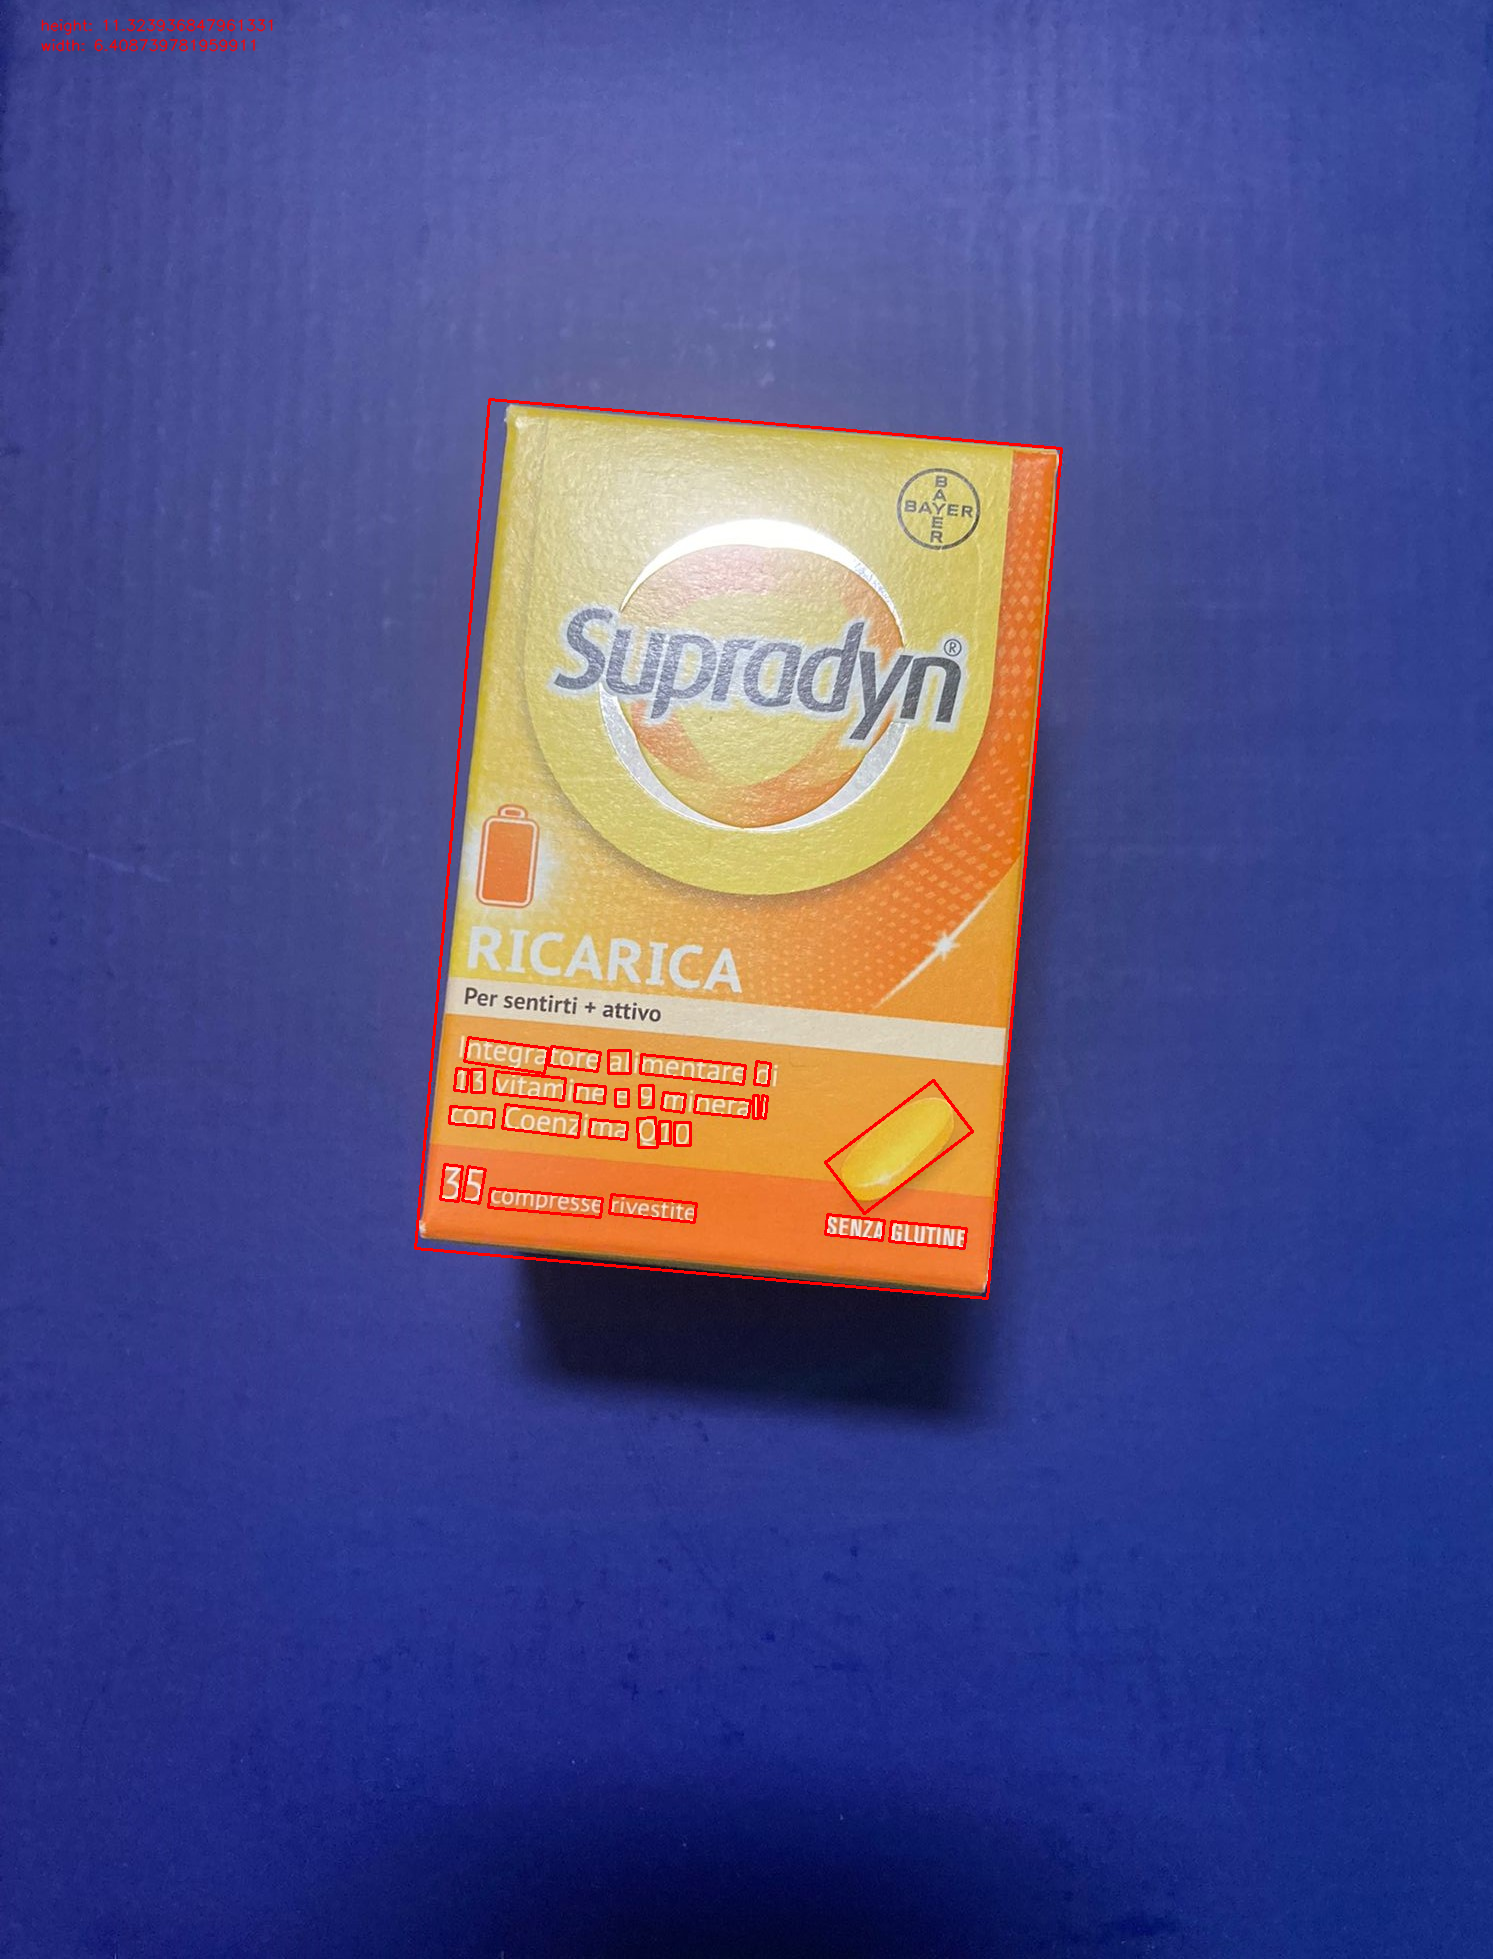

width 6.408739781959911 height 11.323936847961331


In [113]:
display(Image(filename='image.png'))

print('width', width, 'height', height)